<a href="https://colab.research.google.com/github/sarathkumar000/Preprocessing/blob/master/ModelFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, roc_curve, auc, roc_auc_score, 
                             confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

from google.colab import files
import pandas as pd
import io
import time

NumPy 1.17.5
SciPy 1.4.1
Scikit-Learn 0.22.1


In [17]:
uploaded = files.upload()
df1 = pd.read_csv(io.StringIO(uploaded['clean.csv'].decode('cp1252')),)
df1.head()


Saving clean.csv to clean (1).csv


,Unnamed: 0,Valid,Review
0,0,1.0,something definitely wrong get touch vet take ...
1,1,1.0,shaking often sign pain distress mental physic...
2,2,0.0,time tell u take vet
3,3,0.0,happy new year l take tall glass bubbly please
4,4,0.0,happy new year otis blurted family raise glass...


In [18]:
output = pd.DataFrame(columns=['X', 'Y'])
df1.dropna() 
x=df1['Review']
y=df1['Valid']
output['X']=x.copy()
output['Y']=y.copy()
#pd.options.display.float_format = '{:,.0f}'.format
output['Y'] = output['Y'].fillna(0.0).astype(int)
output.head()

,X,Y
0,something definitely wrong get touch vet take ...,1
1,shaking often sign pain distress mental physic...,1
2,time tell u take vet,0
3,happy new year l take tall glass bubbly please,0
4,happy new year otis blurted family raise glass...,0


In [0]:
def BOW_vectorization():
    count_vectorizer = CountVectorizer()
    
    bow_text = count_vectorizer.fit_transform(output['X'].values.astype('U'))
    bow_feature_names = count_vectorizer.get_feature_names()
    #visualizations().plot_frequency_distribution(bow_text, bow_feature_names)
    #X = pd.DataFrame(bow_text.toarray(), columns = bow_feature_names)
    Y = output['Y']
    X=bow_text.toarray()
    #visualizations().plot_TSNE_distribution(bow_text, Y)
    return X, Y

def TFIDF_vectorization():
    tfidf_vectorizer = TfidfVectorizer(max_features = 5500)
    tfidf_text = tfidf_vectorizer.fit_transform(output['X'].values.astype('U'))
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    #visualizations().plot_frequency_distribution(tfidf_text, tfidf_feature_names)
    X = tfidf_text.toarray()
    #pd.DataFrame(tfidf_text.toarray(), columns = tfidf_feature_names)
    Y = output['Y']
    #visualizations().plot_TSNE_distribution(tfidf_text, Y)
    return X, Y

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
X1, Y1 =TFIDF_vectorization()
print(type(X1))
svd = TruncatedSVD(algorithm='randomized',n_components=200, n_iter=7, random_state=None,tol=0.0)
X2=svd.fit_transform(X1)
print(type(X2))
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X2, Y1, test_size = 0.2, random_state = 12)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
def decision_tree_classification():
    classifier = DecisionTreeClassifier(criterion='gini', splitter='best',  max_depth=None, random_state=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
    start_time = time.time()
    classifier.fit(Xtrain,Ytrain)
    predictions = classifier.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    elapsed_time = (time.time() - start_time)
    print('Decision Tree Classification :')
    print('Accuracy: {0}'.format(accuracy))
    print('Elapsed Time: {0}'.format(elapsed_time))
    confusionMatrix(Ytest, predictions)
    classificationReport(Ytest, predictions)
    plot_roc_auc_curve(Ytest, predictions)

def random_forest_classification():
    classifier = RandomForestClassifier(
            criterion='gini', n_estimators=100, max_depth=None, random_state=None, min_samples_split=2, min_samples_leaf=1, max_features=None
                                                  )
    start_time = time.time()
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    elapsed_time = (time.time() - start_time)
    print('Random Forest Classification :')
    print('Accuracy: {0}'.format(accuracy))
    print('Elapsed Time: {0}'.format(elapsed_time))
    confusionMatrix(Ytest, predictions)
    classificationReport(Ytest, predictions)
    plot_roc_auc_curve(Ytest, predictions)
def knn_classification():
    classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto',  n_jobs=None)
    start_time = time.time()
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    elapsed_time = (time.time() - start_time)
    print('KNN Classification :')
    print('Accuracy: {0}'.format(accuracy))
    print('Elapsed Time: {0}'.format(elapsed_time))
    confusionMatrix(Ytest, predictions)
    classificationReport(Ytest, predictions)
    plot_roc_auc_curve(Ytest, predictions)  

def multinomialNB_classification():
    classifier = MultinomialNB(alpha=1.0, fit_prior=False)
    start_time = time.time()
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    elapsed_time = (time.time() - start_time)
    print('MultinomialNB Classification :')
    print('Accuracy: {0}'.format(accuracy))
    print('Elapsed Time: {0}'.format(elapsed_time))
    confusionMatrix(Ytest, predictions)
    classificationReport(Ytest, predictions)
    plot_roc_auc_curve(Ytest, predictions)
def svm_classification():
    classifier = SVC(kernel='linear', random_state=None, C=1, gamma=1.0)
    start_time = time.time()
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    accuracy = accuracy_score(Ytest, predictions)
    elapsed_time = (time.time() - start_time)
    print('SVM Classification :')
    print('Accuracy: {0}'.format(accuracy))
    print('Elapsed Time: {0}'.format(elapsed_time))
    confusionMatrix(Ytest, predictions)
    classificationReport(Ytest, predictions)
    plot_roc_auc_curve(Ytest, predictions)

In [0]:
import sys
sys.setrecursionlimit(10000)

Decision Tree Classification :
Accuracy: 0.88531799729364
Elapsed Time: 6.890247583389282
Confusion Matrix: [[ 337  153    0]
 [ 185 2280    1]
 [   0    0    0]]
Classification report:               precision    recall  f1-score   support

           0       0.65      0.69      0.67       490
           1       0.94      0.92      0.93      2466
          11       0.00      0.00      0.00         0

    accuracy                           0.89      2956
   macro avg       0.53      0.54      0.53      2956
weighted avg       0.89      0.89      0.89      2956

ROC score : 0.8064307231408379
AUC score : 0.8064307231408379


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


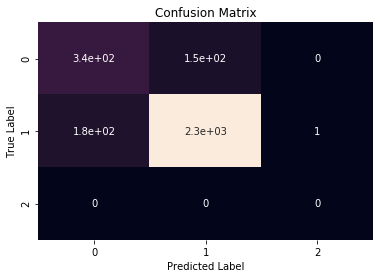

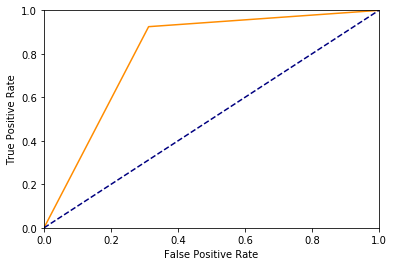

In [27]:
#ml_models = machine_learning_models(Xtrain, Xtest, Ytrain, Ytest)
decision_tree_classification()


Random Forest Classification :
Accuracy: 0.9303112313937754
Elapsed Time: 408.061621427536
Confusion Matrix: [[ 317  173]
 [  33 2433]]
Classification report:               precision    recall  f1-score   support

           0       0.91      0.65      0.75       490
           1       0.93      0.99      0.96      2466

    accuracy                           0.93      2956
   macro avg       0.92      0.82      0.86      2956
weighted avg       0.93      0.93      0.93      2956

ROC score : 0.8167783901881921
AUC score : 0.8167783901881921


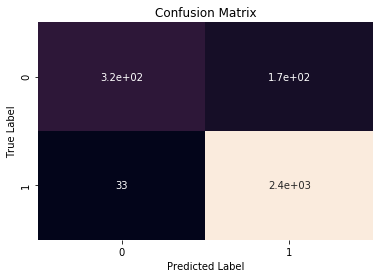

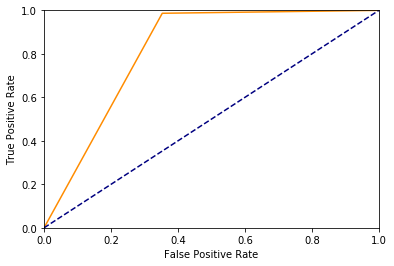

In [28]:
random_forest_classification()

KNN Classification :
Accuracy: 0.8910690121786198
Elapsed Time: 15.048553228378296
Confusion Matrix: [[ 267  223]
 [  99 2367]]
Classification report:               precision    recall  f1-score   support

           0       0.73      0.54      0.62       490
           1       0.91      0.96      0.94      2466

    accuracy                           0.89      2956
   macro avg       0.82      0.75      0.78      2956
weighted avg       0.88      0.89      0.88      2956

ROC score : 0.7523759868911067
AUC score : 0.7523759868911067


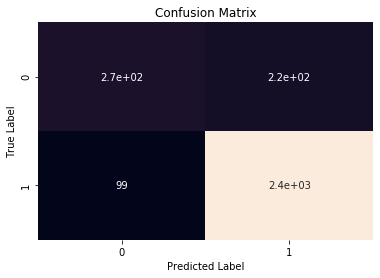

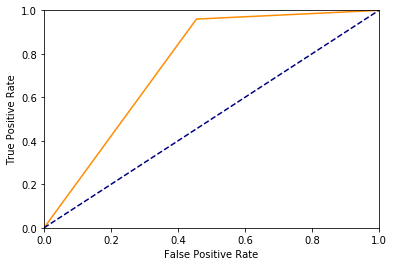

In [29]:
knn_classification()

SVM Classification :
Accuracy: 0.8690798376184032
Elapsed Time: 24.82358407974243
Confusion Matrix: [[ 111  379]
 [   8 2458]]
Classification report:               precision    recall  f1-score   support

           0       0.93      0.23      0.36       490
           1       0.87      1.00      0.93      2466

    accuracy                           0.87      2956
   macro avg       0.90      0.61      0.65      2956
weighted avg       0.88      0.87      0.83      2956



NameError: ignored

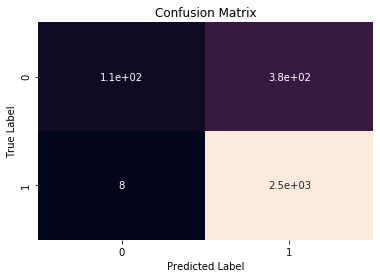

In [30]:
svm_classification()

In [0]:
multinomialNB_classification()

In [0]:
def plot_roc_auc_curve( Ytest, Ypred):
    fpr, tpr, thresholds = roc_curve(Ytest, Ypred, pos_label =1)
    roc_auc = auc(fpr, tpr)
    auc_score = roc_auc_score(Ytest, Ypred)
    print('ROC score : {0}'.format(roc_auc))
    print('AUC score : {0}'.format(auc_score))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0,1], [0,1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

def plot_frequency_distribution(text, feature_names):
    visualizer = FreqDistVisualizer(features=feature_names)
    visualizer.fit(text)
    visualizer.poof()
  #  t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction algorithm for visualizing high-dimensional datasets.
def plot_TSNE_distribution(self, text, labels):
    tsne = TSNEVisualizer()
    tsne.fit_transform(text, labels)
    tsne.poof()

In [0]:
def confusionMatrix(Ytest, Ypred):
    results = confusion_matrix(Ytest, Ypred)
    print('Confusion Matrix: {0}'.format(results))
    sns.heatmap(results, annot=True, cbar=False)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')


def classificationReport(Ytest, Ypred):
    report = classification_report(Ytest, Ypred)
    print('Classification report: {0}'.format(report))